## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

## Defining Functions

In [2]:
#Functions for data normalization
def data_normalize(y):
	mean_y = np.mean(y)
	std_y = statistics.stdev(y)
	norm_y=[]
	for i in y:
		y_val = (i-mean_y)/(std_y)
		norm_y.append(y_val)
	return norm_y

def column(matrix, i):
    return [row[i] for row in matrix]

def array_noramlize(Y):
    Norm_array=[]
    n= len(Y[1])
    for i in range(n):
        col= column(Y, i)
        norm_col = data_normalize(col)
        Norm_array.append(norm_col)
    return np.transpose(Norm_array)

def accuracy_rate(test_y,y_estimated):
    count=0
    for i in range(len(test_y)):
        if y_estimated[i]==test_y[i]:
            count= count+1
    acc_rate = count/len(test_y)
    return acc_rate

## Main Program

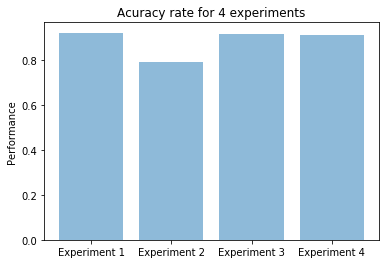

In [4]:
#--------------Reading Dataset-----------------#
df = pd.read_csv("spambase_mod.csv")
#print(df.shape)

#separating dataset into x and y    
data_array = df.values

init_x= data_array[:, 0:57]
init_y = data_array[:, -1] 

x= np.array(array_noramlize(init_x))

reshaped_y = init_y.reshape(init_x.shape[0], -1) 
y= np.array(reshaped_y) 


#dataset dividing into training and testing parts
train_x = x[:4000, :57] 
train_y = y[:4000, :1]
test_x = x[4000:4601, :57]
test_y = y[4000:4601, :1]


#Neural Networks
exp=[[5], [5,5],[25],[25,25]]
episode=10
acccuracy_rate=[]
for i in exp:
    from sklearn.neural_network import MLPClassifier
    accuracy_sum=0
    for j in range(episode):
        mlp = MLPClassifier(hidden_layer_sizes=i,max_iter=5,alpha=0.1, activation='logistic', solver='sgd', learning_rate_init=0.1)
        mlp.fit(train_x,train_y)
        predictions = mlp.predict(test_x)
        acc_rate= accuracy_rate(test_y, predictions)
        accuracy_sum+=acc_rate
    acccuracy_rate.append(accuracy_sum/episode)
    
#Plotting the graph of performance
import matplotlib.pyplot as plt
objects = ('Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, acccuracy_rate, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Performance')
plt.title('Acuracy rate for 4 experiments')

plt.show() 